### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering

### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

### 2. Importing Data

In [3]:
# Project folder path
path=r'/Users/sukihabibe/Desktop/CareerFoundry/Portofolio_A6/World_Happiness_Report'

In [4]:
# Importing data

df=pd.read_csv(os.path.join(path, '02_Data', 'Prepared', 'df_all3.csv'))

In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range
0,0,0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score
1,1,1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score
2,2,2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score
3,3,3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score
4,4,4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score


In [6]:
# Drop 'Unnamed:0' & Unnamed:0.1

df=df.drop("Unnamed: 0",axis=1)

df=df.drop("Unnamed: 0.1",axis=1)

### 3. The Elbow Technique

In [7]:
# exclude all categorical columns

dfsub=df[['Happiness score','GDP per capita','Social support',
          'Healthy life expectancy','Freedom to make life choices','Generosity',
          'Perceptions of corruption']]

In [8]:
dfsub.head()

,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [9]:
from sklearn.cluster import KMeans
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(dfsub).score(dfsub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  war

[-1294.0246785408488,
 -488.9731162287121,
 -306.97617223781754,
 -237.60276123614528,
 -194.75683831249975,
 -177.28772343167986,
 -162.98427217543207,
 -152.28416786510243,
 -144.53611674888728]

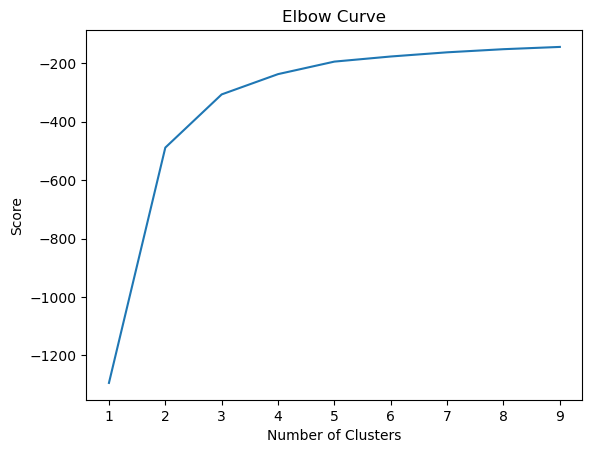

In [11]:
# Plot the elbow curve using PyLab.

import pylab as pl
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

## The elbow starts to flatten starting at 3. The best number of clusters seem to be 3. 

### 4. K-means clustering

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(dfsub)

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [14]:
df['clusters'] = kmeans.fit_predict(dfsub)

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range,clusters
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score,2
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score,2
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score,2
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score,2
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score,2


In [16]:
df['clusters'].value_counts()

0    308
1    278
2    196
Name: clusters, dtype: int64

### GDP vs Happiness clusters

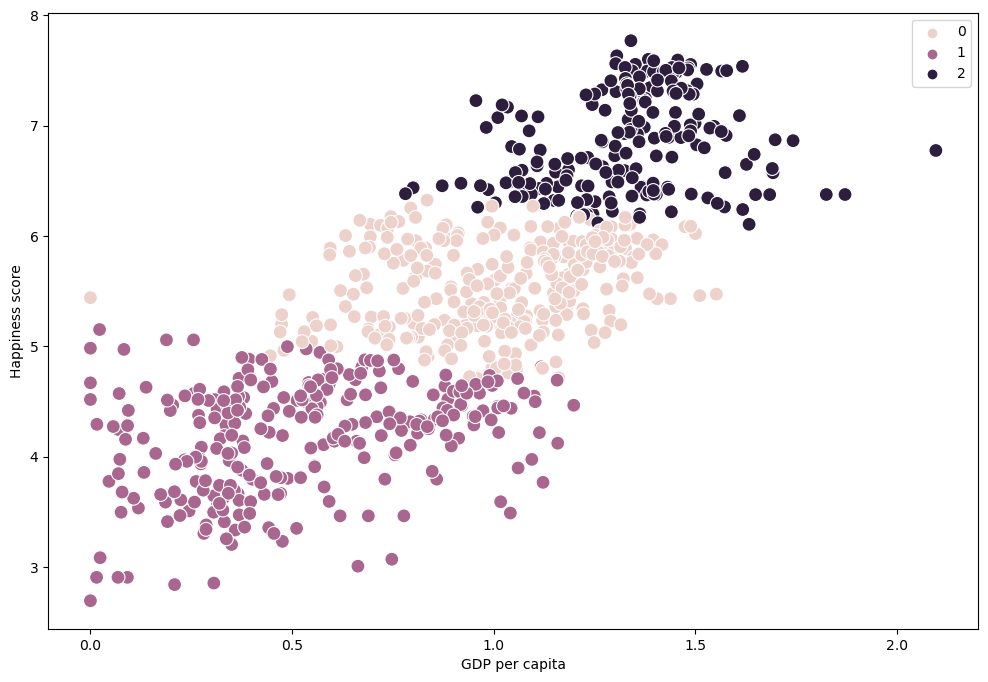

In [17]:
# Plot the clusters for the "Happiness score" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP per capita'], y=df['Happiness score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

#### GDP vs Happiness
From this plot we can conclude that GDP does have a positive relationship with Happiness score, but it is definetely not the only factor that plays a big role.  

Interesting to point out is that high happiness scores (above around 6) does not occurs when GDP scores are low( below around 0.75), and converseley low scores for happiness (below around 5), does not occur when GDP score is high (above around 1.25)

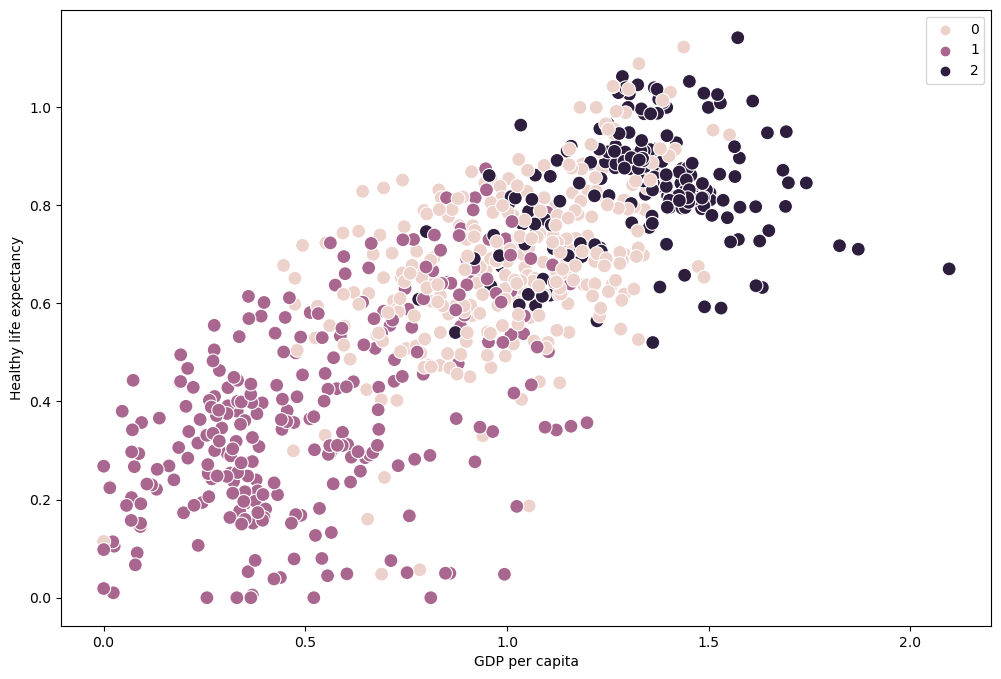

In [18]:
# Plot the clusters for the "Social support" and "GDP per capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP per capita'], y=df['Healthy life expectancy'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP per capita') # Label x-axis.
plt.ylabel('Healthy life expectancy') # Label y-axis.
plt.show()

#### Healthy life expectancy vs GDP per capita
This plot also reflects a clear positive relationship between GDP and Healthy life expectancy. No clear seperation of the clusters visible.

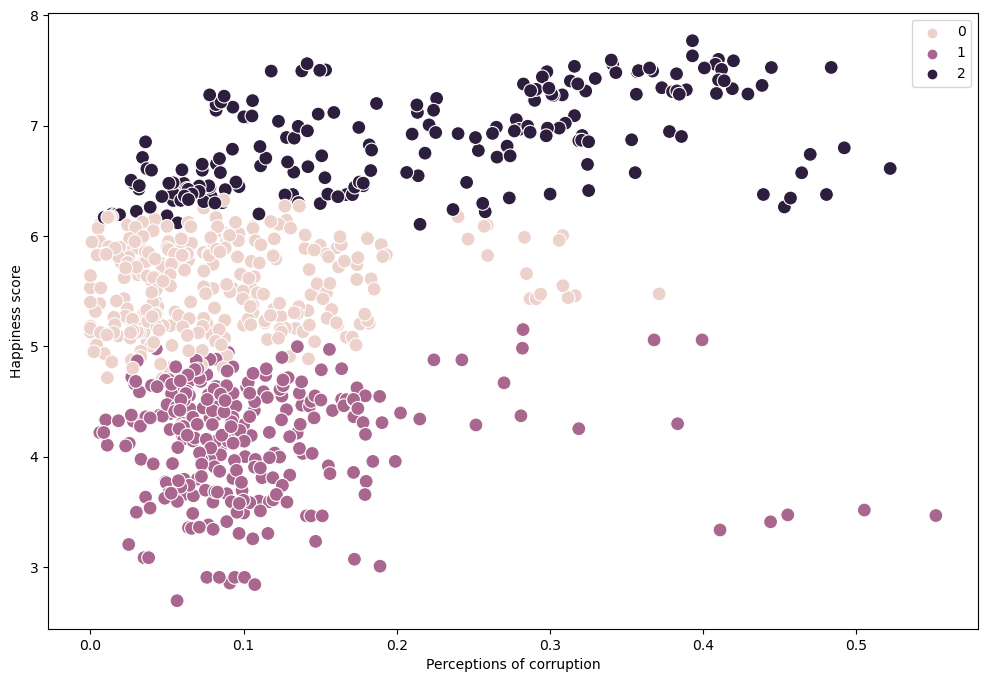

In [19]:
# Plot the clusters for the "Happiness score" and "Perceptions of corruption" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Perceptions of corruption'], y=df['Happiness score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Perceptions of corruption') # Label x-axis.
plt.ylabel('Happiness score') # Label y-axis.
plt.show()

#### Perceptions of corruption vs Happiness score
#### When perception of corruption is low there is no correlation visible with happiness score. When the score is  higher than 0.2 there seem to be a positive correlation.

#### High scores of corruption perceptions (above 0.4) only has high or low happiness scores, skipping the mid section (scores between 4 and 6). I suspect that GDP could be the explanation. It might be possible that these high scores where perception of government is also high is due to high GDP scores. 


#### Do the countries with high corruption scores and high happiness score also have high GDP? 

In [20]:
# filter countries with Perception of corruption higher than 0.4

df_filtered2 = df.loc[df['Perceptions of corruption'] >= 0.4]

In [21]:
df_filtered2.shape

(26, 13)

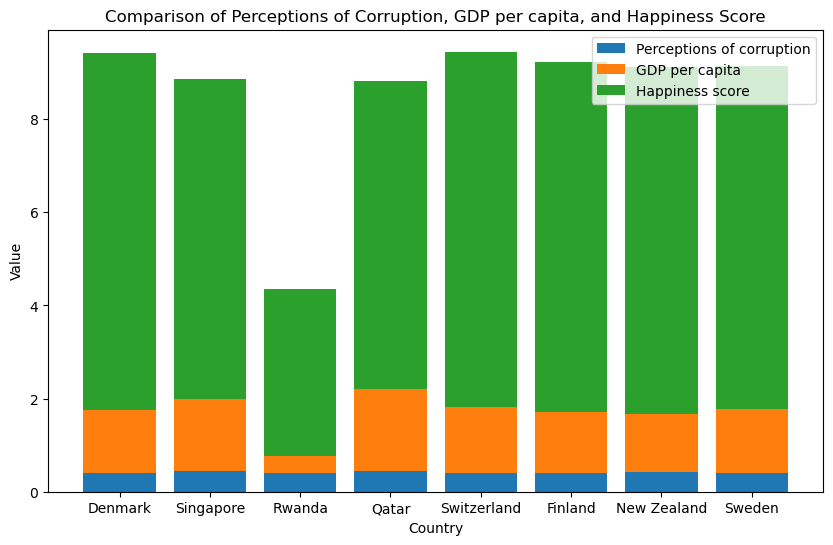

In [22]:
# set x-axis values
x = df_filtered2['Country']

# set y-axis values
y1 = df_filtered2['Perceptions of corruption']
y2 = df_filtered2['GDP per capita']
y3 = df_filtered2['Happiness score']

# create stacked column graph
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, y1, label='Perceptions of corruption')
ax.bar(x, y2, bottom=y1, label='GDP per capita')
ax.bar(x, y3, bottom=y1+y2, label='Happiness score')

# set graph title and axis labels
ax.set_title('Comparison of Perceptions of Corruption, GDP per capita, and Happiness Score')
ax.set_xlabel('Country')
ax.set_ylabel('Value')

# add legend
ax.legend()

# display graph
plt.show()

#### Analysis for all countries with high perceptions of corruption, 0.40. The 75% perntile = 0.16 (analyis in excel file under 'anal1)
    --> Countries with high 'Happiness scores': 6.26 and higher (75% percentile = 6.19), also have high 'GDP per capita': 1.25 or higher (75% percentile = 1.24). 
    --> Country (Rwanda) with low 'Happiness scores': 3.52 and lower (25% percentile = 4.51), also have low 'GDP per capita': 0.37 or lower (25% percentile = 0.61)
      
    Conclusion: It seems like the 'GDP per capita' is correlated to the Happiness scores when 'Perception of corruption' is extremely high: when GDP is high, so is Happiness score, when GDP is low, so is 'Happiness scores'.  However, the number of observations in this group is very low and they might just be outliers. 									
	Interesting to notice: Countries like New Zealand, Sweden, Denmark, Switzerland, and Finland are generally considered to be counries with little corruption compared to the rest of the world. It is quite a surprisse to see that they scored high in this category some years.											
											

/Users/sukihabibe/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Perceptions of corruption', ylabel='Density'>

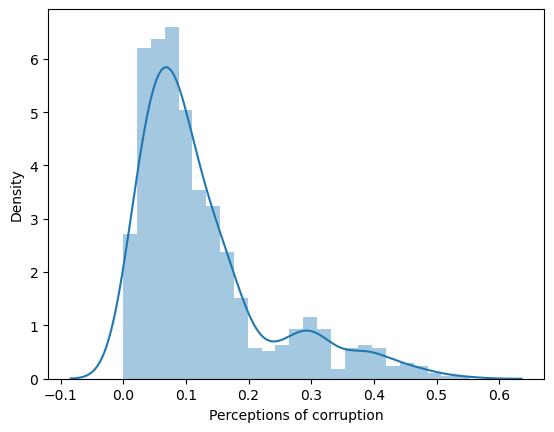

In [23]:
# Check for extreme values

sns.distplot(df['Perceptions of corruption'], bins=25) 

In [24]:
# filter countries with Perception of corruption higher than 0.156

df_filtered3 = df.loc[df['Perceptions of corruption'] >= 0.156]

In [25]:
df_filtered3.shape

(197, 13)

In [26]:
df_filtered3['Region'].value_counts()

Western Europe                     66
Middle East and Northern Africa    27
Sub-Saharan Africa                 26
Central and Eastern Europe         25
Southeastern Asia                  14
Latin America and Caribbean        11
Australia and New Zealand          10
Eastern Asia                        8
North America                       6
Southern Asia                       4
Name: Region, dtype: int64

In [27]:
df['Region'].value_counts()

Sub-Saharan Africa                 196
Central and Eastern Europe         145
Latin America and Caribbean        111
Western Europe                     103
Middle East and Northern Africa     98
Southeastern Asia                   44
Southern Asia                       35
Eastern Asia                        30
Australia and New Zealand           10
North America                       10
Name: Region, dtype: int64

In [28]:
# sort the dataframe by Happiness score in descending order

df_filtered3.sort_values('Happiness score', ascending=False, inplace=True)

/var/folders/72/tk7w666d3tv68c6mvyss2jb80000gn/T/ipykernel_70290/3144094968.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered3.sort_values('Happiness score', ascending=False, inplace=True)


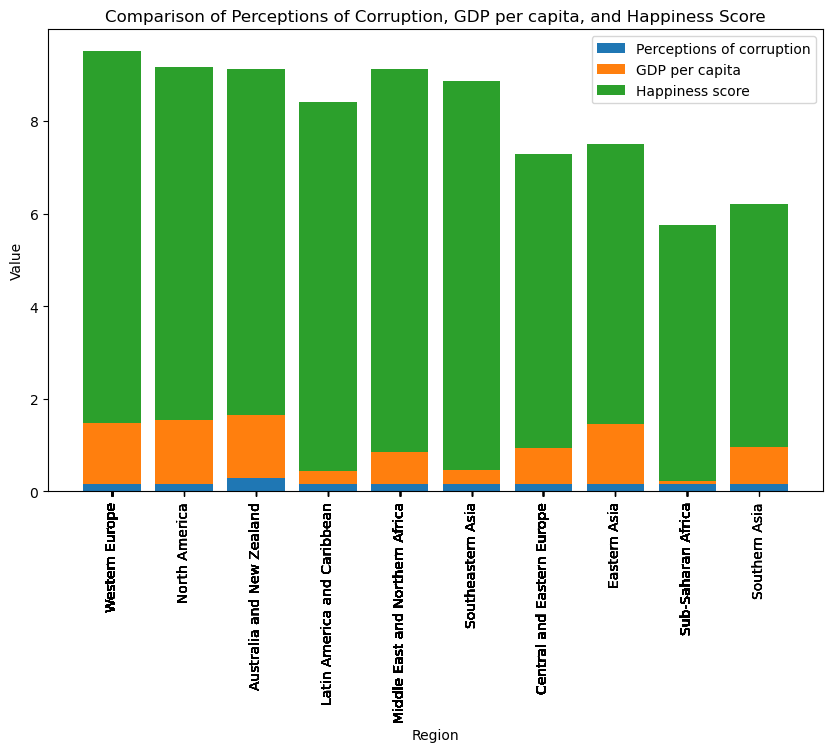

In [29]:
# set x-axis values
x = df_filtered3['Region']

# set y-axis values
y1 = df_filtered3['Perceptions of corruption']
y2 = df_filtered3['GDP per capita']
y3 = df_filtered3['Happiness score']

# create stacked column graph
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x, y1, label='Perceptions of corruption')
ax.bar(x, y2, bottom=y1, label='GDP per capita')
ax.bar(x, y3, bottom=y1+y2, label='Happiness score')

# set tick labels and rotation
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=90)

# set graph title and axis labels
ax.set_title('Comparison of Perceptions of Corruption, GDP per capita, and Happiness Score')
ax.set_xlabel('Region')
ax.set_ylabel('Value')

# add legend
ax.legend()

# display graph
plt.show()

#### High GDP correlates with High scores in the Western World. In Latin America and Caribbean & Southeastern Asia, GDP scored low but Happiness high.  In the Middle East and Norhtern Africa, GDP scored moderate, Happiness scored high.

In [31]:
df.head()

,Year,Country,Region,Overall rank,Happiness score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Happiness-range,clusters
0,2019,Finland,Western Europe,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,High score,2
1,2019,Denmark,Western Europe,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,High score,2
2,2019,Norway,Western Europe,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,High score,2
3,2019,Iceland,Western Europe,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,High score,2
4,2019,Netherlands,Western Europe,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,High score,2


In [34]:
df.groupby('clusters').agg({'Happiness score':['mean', 'median'],'GDP per capita':['mean', 'median'],'Social support':['mean', 'median'], 'Healthy life expectancy':['mean', 'median'],'Freedom to make life choices':['mean', 'median'],'Generosity':['mean', 'median'],'Perceptions of corruption':['mean', 'median']})

Happiness score         GDP per capita           Social support  \
                    mean  median           mean    median           mean   
clusters                                                                   
0               5.536334  5.5250       1.008559  1.024820       1.164116   
1               4.168288  4.2860       0.518708  0.471775       0.812401   
2               6.849066  6.8385       1.334246  1.343140       1.320958   

                   Healthy life expectancy            \
            median                    mean    median   
clusters                                               
0         1.208447                0.684433  0.684500   
1         0.847915                0.376685  0.359870   
2         1.368500                0.833598  0.838177   

         Freedom to make life choices           Generosity            \
                                 mean    median       mean    median   
clusters                                                               
0                            0.401686  0.418136   0.183293  0.172040   
1                            0.336245  0.353500   0.223037  0.204015   
2                            0.532029  0.550068   0.267693  0.261000   

         Perceptions of corruption           
                              mean   median  
clusters                                     
0                         0.086027  0.07149  
1                         0.106609  0.08842  
2                         0.214719  0.19661